## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lifetimes
%matplotlib widget

## Hazard function 

In [77]:
#Baseline 
def h0_Weibull(t, theta):
    (alpha, beta) = theta 
    h0 = alpha / beta * (t / alpha) ** (beta - 1)
    return h0

def H0_Weibull(t, theta):
    alpha, beta = theta 
    H0 = (t / alpha) ** beta
    return H0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
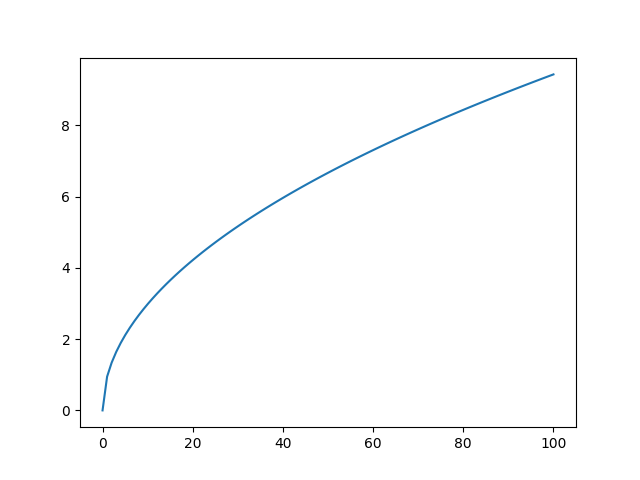

In [81]:
T = np.linspace(0, 100, 100)
theta = (2, 1.5)
y = [h0_Weibull(t, theta) for t in T]
plt.figure()
plt.plot(T,y)
plt.show()

In [106]:
def psi(x):
    return x**2 + x

In [107]:
# Hazard rate function with covariate 
# Weibull
def h_Weibull(t,theta,x):
    h_Weibull = h0_Weibull(t,theta)*np.exp(psi(x))
    return h_Weibull

def H_Weibull(t,theta,x):
    H_Weibull = H0_Weibull(t,theta)*np.exp(psi(x))
    return H_Weibull 

def survival_func_Weibull(t,theta,x):
    return np.exp(-H_Weibull(t,theta,x))

In [108]:
theta = (2, 1.5)

## Affichage d'exemples 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
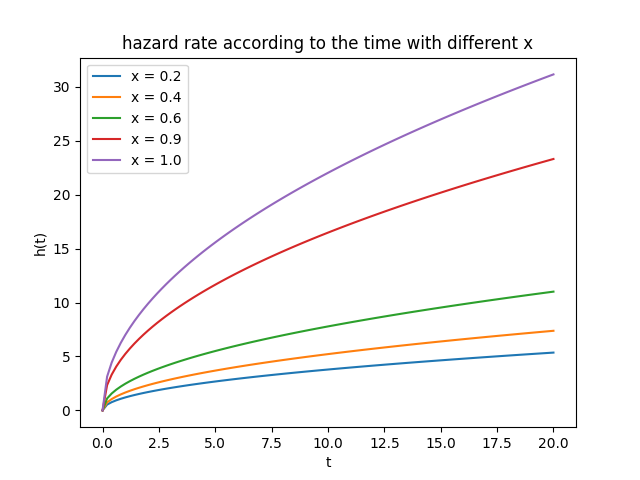

In [109]:
X = np.array([0.2, 0.4, 0.6, 0.9, 1])
T = np.linspace(0, 20, 100)
plt.figure()
for x in X : 
    y = [h_Weibull(t,theta,x) for t in T]
    plt.plot(T, y, label = 'x = '+str(x))
plt.legend()
plt.xlabel('t')
plt.ylabel('h(t)')
plt.title('hazard rate according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
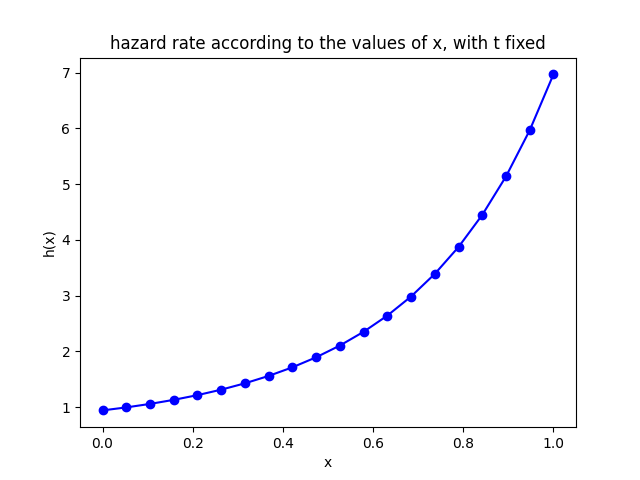

In [110]:
X = np.linspace(0, 1, 20)
t = 1.0
y = [h_Weibull(t, theta, x) for x in X]
plt.figure()
plt.plot(X,y, '-bo')
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('hazard rate according to the values of x, with t fixed')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
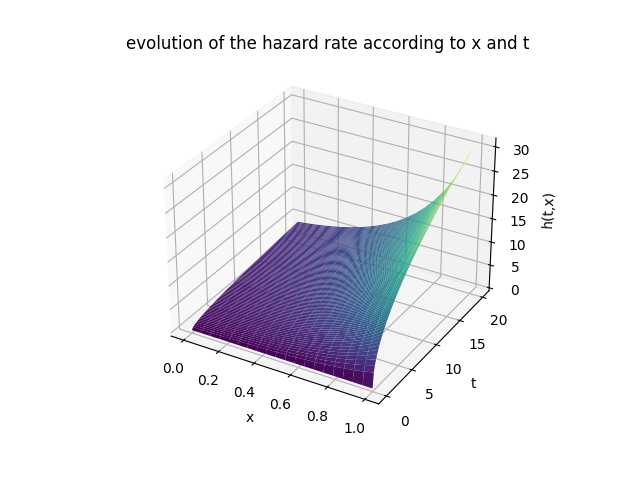

In [111]:
Xs = np.linspace(0, 1, 20)
Ts = np.linspace(0, 20, 100)
X, T = np.meshgrid(Xs, Ts)
h_val = h_Weibull(T, theta, X)
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, h_val, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('evolution of the hazard rate according to x and t');
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('h(t,x)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
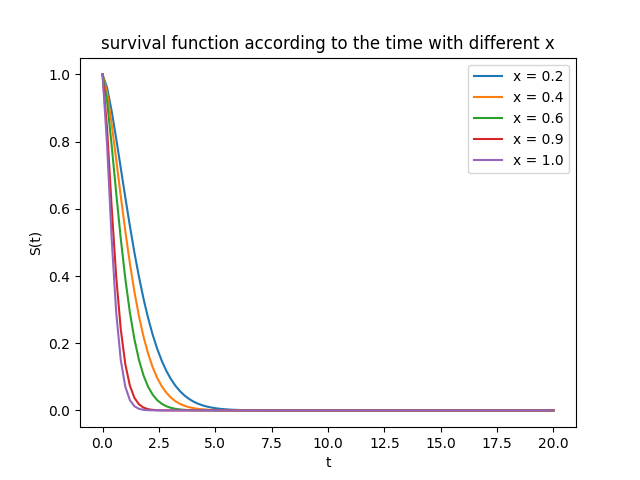

In [112]:
X = np.array([0.2, 0.4, 0.6, 0.9, 1])
T = np.linspace(0, 20, 100)
plt.figure()
for x in X : 
    y = [survival_func_Weibull(t,theta,x) for t in T]
    plt.plot(T, y, label = 'x = '+str(x))
plt.legend()
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('survival function according to the time with different x')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
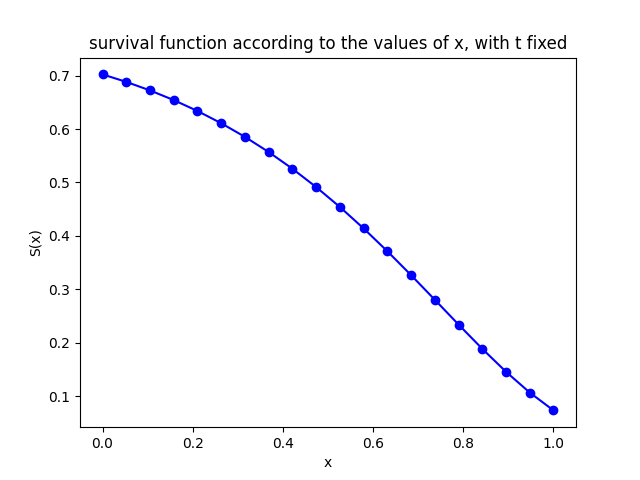

In [113]:
X = np.linspace(0, 1, 20)
t = 1.0
y = [survival_func_Weibull(t, theta, x) for x in X]
plt.figure()
plt.plot(X,y, '-bo')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.title('survival function according to the values of x, with t fixed')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
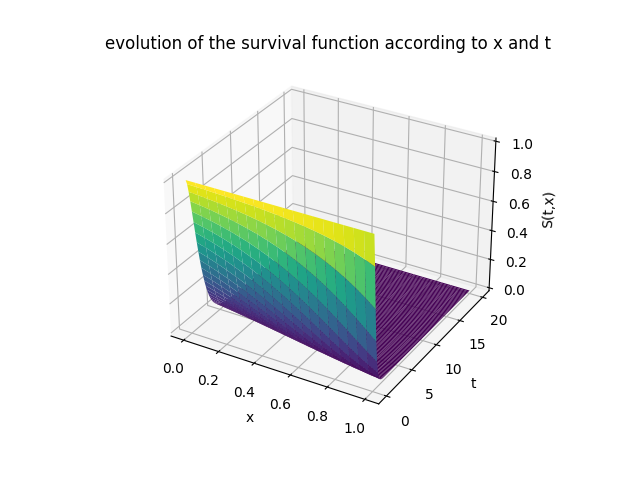

In [114]:
Xs = np.linspace(0, 1, 20)
Ts = np.linspace(0, 20, 100)
X, T = np.meshgrid(Xs, Ts)
S_val = survival_func_Weibull(T, theta, X)
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, S_val, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('evolution of the survival function according to x and t');
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('S(t,x)')
plt.show()

## Data generation 

In [115]:
# outputs : 
# T : death times 
# X : value of the covariable for each individual 
# delta[i] : censure or not of i-th individual  

## Approximation of $\Psi$ as a linear function : partial likelihood

In [120]:
#Trier X, T, et delta en fonction de T 
def partial_likelihood(mu, T, X, delta):
    T, X, delta = T, X, delta
    dl = 0
    mu = np.zeros(len(X[0]))
    exp_x = np.exp([np.dot(mu.T, Xi) for Xi in X])
    X_exp_x = np.array([Xi * exp_xi for Xi, exp_xi in zip(X, exp_x)])
    for indiv in range(len(T)):
        dl += delta[indiv]*(X[indiv] - np.sum(X_exp_x[indiv:])/np.sum(exp_x[indiv:]))
    return dl

In [121]:
# Resolution
from scipy.optimize import fsolve
root = fsolve(partial_likelihood, np.ones(len(X)) ,args = [T, X, delta])

NameError: name 'delta' is not defined

## Results of this approach  

## Local likelihood approach 